# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_url + city)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | tvoroyri
Processing Record 4 of Set 1 | aykhal
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | kirensk
Processing Record 8 of Set 1 | bayanhongor
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | sangmelima
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | ciudad lazaro cardenas
Processing Record 13 of Set 1 | kalghatgi
Processing Record 14 of Set 1 | amasra
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | newman
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | bafq
Processing Record 20 of Set 1 | suntar
Processing Record 21 of Set 1 | namibe
Processing Record 22 of Set 1 | kombolcha
Processing Record 23 

Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | tan-tan
Processing Record 42 of Set 4 | watseka
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | sterling
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | reuleuet
Processing Record 47 of Set 4 | port alfred
Processing Record 48 of Set 4 | mouila
Processing Record 49 of Set 4 | luanda
Processing Record 0 of Set 5 | loule
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | rundu
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | liuhe
Processing Record 5 of Set 5 | lingyuan
Processing Record 6 of Set 5 | vanimo
Processing Record 7 of Set 5 | skowhegan
Processing Record 8 of Set 5 | ust-nera
Processing Record 9 of Set 5 | kankara
Processing Record 10 of Set 5 | san mariano
Processing Record 11 of Set 5 | guerrero negro
Processing Record 12 of Set 5 | neelankarai
Processing Record 13 of Set 5 | dunedin
Processing Record 14 o

Processing Record 30 of Set 8 | plettenberg bay
Processing Record 31 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 32 of Set 8 | crane
Processing Record 33 of Set 8 | berezovo
Processing Record 34 of Set 8 | vallegrande
Processing Record 35 of Set 8 | mata-utu
Processing Record 36 of Set 8 | el kef
Processing Record 37 of Set 8 | san pedro
Processing Record 38 of Set 8 | saint croix
Processing Record 39 of Set 8 | wenchang
Processing Record 40 of Set 8 | kavaratti
Processing Record 41 of Set 8 | loango
Processing Record 42 of Set 8 | sao tome
Processing Record 43 of Set 8 | cranbrook
Processing Record 44 of Set 8 | colonia
Processing Record 45 of Set 8 | bayganin
Processing Record 46 of Set 8 | same
Processing Record 47 of Set 8 | montlucon
Processing Record 48 of Set 8 | selfoss
Processing Record 49 of Set 8 | brisas de zicatela
Processing Record 0 of Set 9 | malanje
Processing Record 1 of Set 9 | avrameni
Processing Record 2 of Set 9 | ambon
Proces

Processing Record 23 of Set 12 | deqen
Processing Record 24 of Set 12 | susanville
Processing Record 25 of Set 12 | yuzhno-kurilsk
Processing Record 26 of Set 12 | novodvinsk
Processing Record 27 of Set 12 | comodoro rivadavia
Processing Record 28 of Set 12 | beberibe
Processing Record 29 of Set 12 | genhe
Processing Record 30 of Set 12 | sotuta
Processing Record 31 of Set 12 | tidjikja
Processing Record 32 of Set 12 | freetown
Processing Record 33 of Set 12 | gerash
Processing Record 34 of Set 12 | ta`u
Processing Record 35 of Set 12 | wuhai
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,1.76,98,100,9.86,SJ,1681778841
1,port-aux-francais,-49.3500,70.2167,6.22,92,95,9.33,TF,1681778841
2,tvoroyri,61.5556,-6.8111,8.30,96,96,6.36,FO,1681778841
3,aykhal,66.0000,111.5000,-6.93,92,100,3.30,RU,1681778842
4,port mathurin,-19.6833,63.4167,26.16,74,18,8.37,MU,1681778842


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,1.76,98,100,9.86,SJ,1681778841
1,port-aux-francais,-49.3500,70.2167,6.22,92,95,9.33,TF,1681778841
2,tvoroyri,61.5556,-6.8111,8.30,96,96,6.36,FO,1681778841
3,aykhal,66.0000,111.5000,-6.93,92,100,3.30,RU,1681778842
4,port mathurin,-19.6833,63.4167,26.16,74,18,8.37,MU,1681778842


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

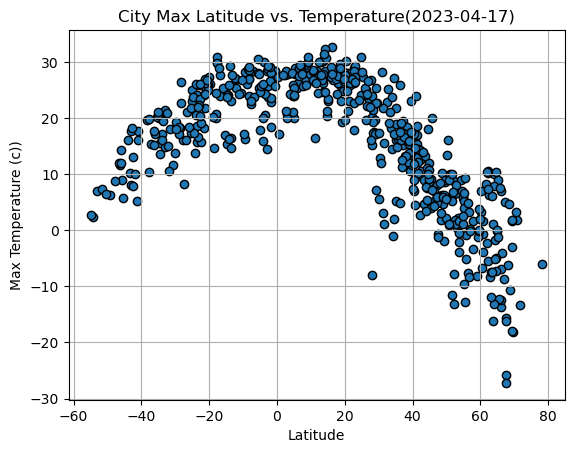

In [9]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c))")
plt.title("City Max Latitude vs. Temperature(%s)"% time.strftime("%Y-%m-%d"))
plt.grid(True)

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

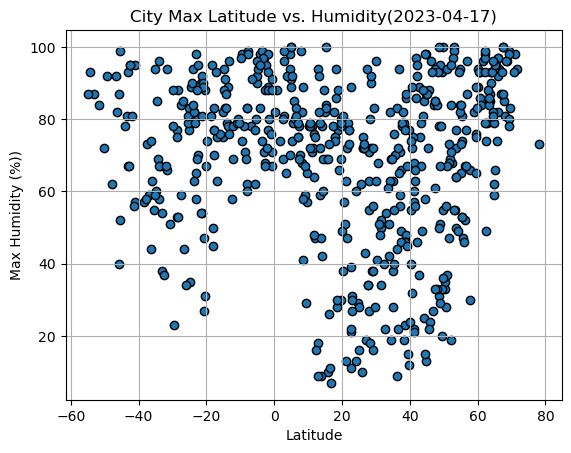

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Humidity (%))")
plt.title("City Max Latitude vs. Humidity(%s)"% time.strftime("%Y-%m-%d"))
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

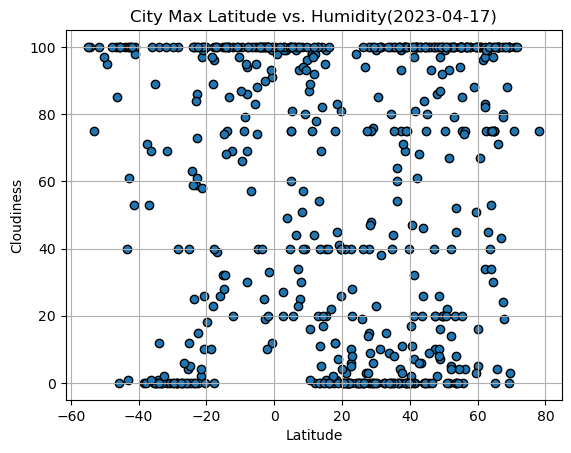

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs. Humidity(%s)"% time.strftime("%Y-%m-%d"))
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

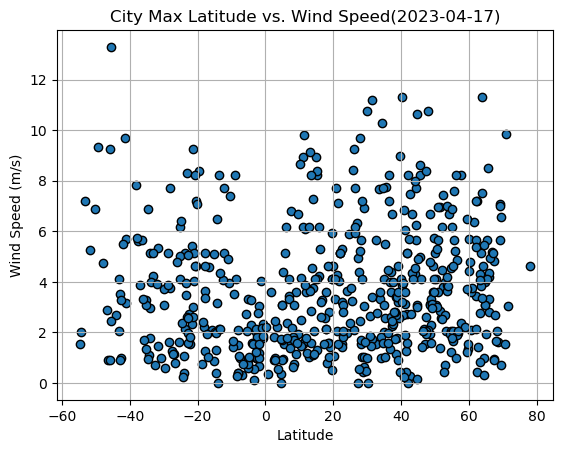

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed(%s)"% time.strftime("%Y-%m-%d"))
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values, edgecolor="black")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.grid(True)
    print(f"the rvalue is ",(rvalue))
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,1.76,98,100,9.86,SJ,1681778841
2,tvoroyri,61.5556,-6.8111,8.30,96,96,6.36,FO,1681778841
3,aykhal,66.0000,111.5000,-6.93,92,100,3.30,RU,1681778842
6,kirensk,57.7853,108.1119,-3.38,66,100,2.38,RU,1681778842
7,bayanhongor,46.7167,100.1167,5.33,27,100,2.13,MN,1681778843


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,6.22,92,95,9.33,TF,1681778841
4,port mathurin,-19.6833,63.4167,26.16,74,18,8.37,MU,1681778842
5,grytviken,-54.2811,-36.5092,2.30,93,100,2.00,GS,1681778842
10,invercargill,-46.4000,168.3500,11.68,82,85,0.89,NZ,1681778843
17,hithadhoo,-0.6000,73.0833,28.44,67,12,1.78,MV,1681778844


###  Temperature vs. Latitude Linear Regression Plot

the rvalue is  -0.8703510781030751


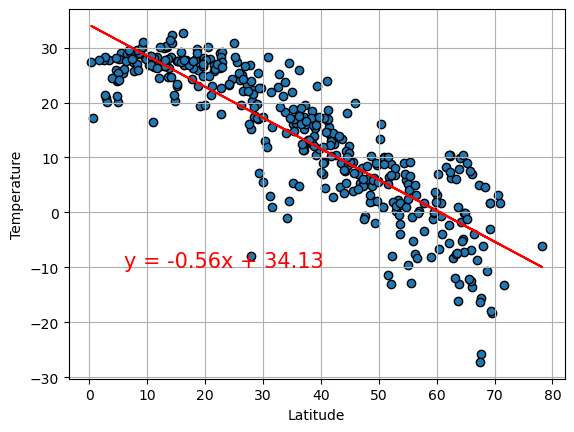

In [16]:
# Linear regression on Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Temperature", (6,-10))

the rvalue is  0.7519641905751298


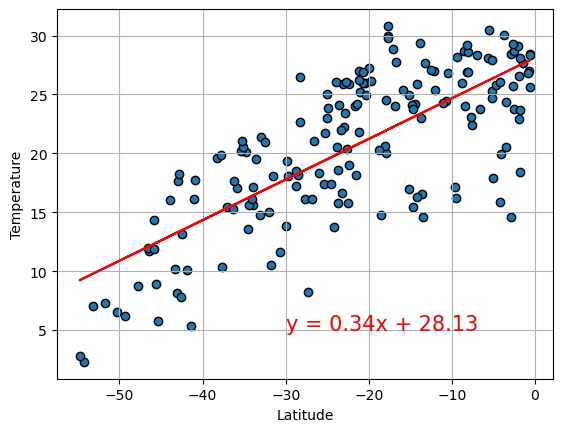

In [17]:
# Linear regression on Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Temperature", (-30,5))

**Discussion about the linear relationship:** what we can tell from our temperature vs latitude corralation for the northern hemisfere as the p_value is negative is almost perfect meaning that everytime that the tempetarure rises the latitude decrease in other hand the Southern hemisfere everytime that my temperature increase my latitude decrese. All this results could be due to a cernain number of factores and one could be the inclination of the earth or the proximity to the ecuador for those cities etc 

### Humidity vs. Latitude Linear Regression Plot

the rvalue is  0.18303076244632444


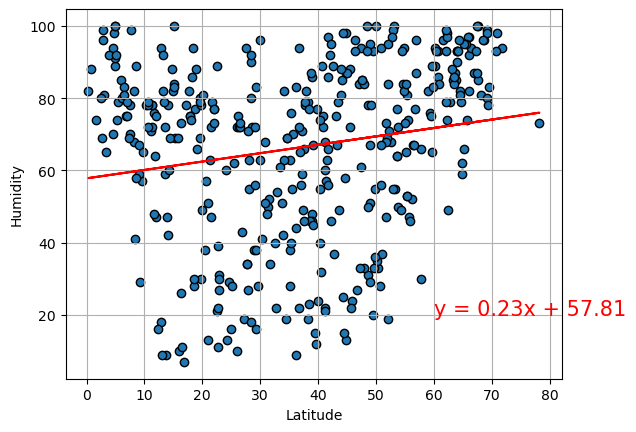

In [18]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity", (60,20))

the rvalue is  0.2130012126288274


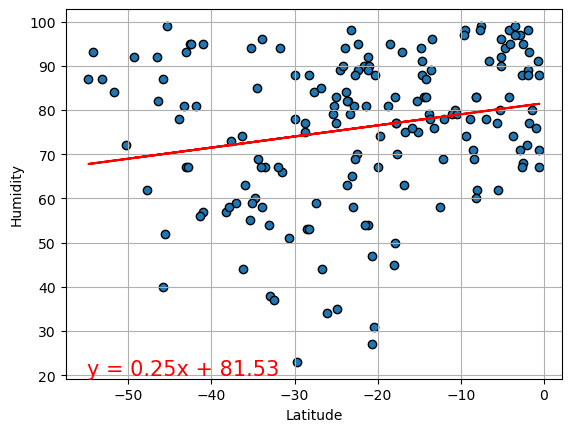

In [19]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity", (-55,20))

**Discussion about the linear relationship:** Both Graphs are similars, there are a slightly increase correlation making higher the south than the noth but both positives and really close to zero 

### Cloudiness vs. Latitude Linear Regression Plot

the rvalue is  0.15982360648415436


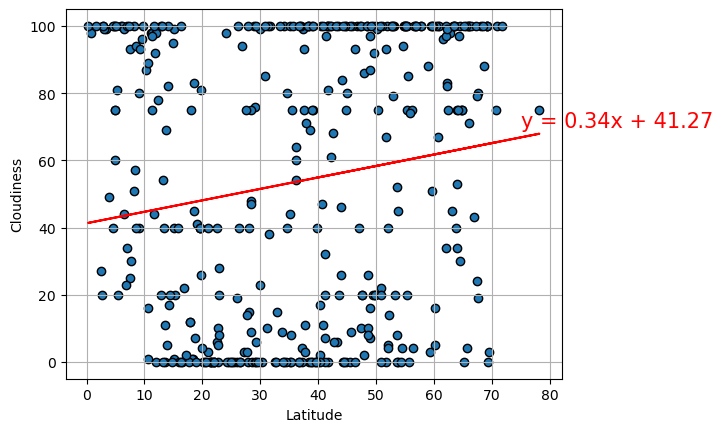

In [20]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness", (75,70))

the rvalue is  0.1685774795933191


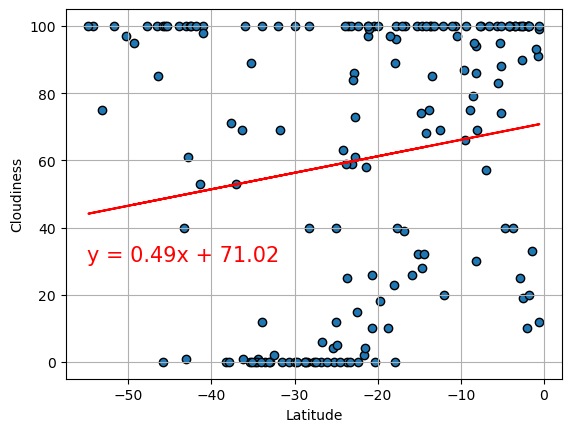

In [22]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness", (-55,30))

**Discussion about the linear relationship:** Even though the North and the South are one in latitude positive and the other in negative, both are week close to zero been Northern Hemisphere rvalue 0.15 and Southern Hemisphere rvalue 0.16

### Wind Speed vs. Latitude Linear Regression Plot

the rvalue is  0.12769552935310718


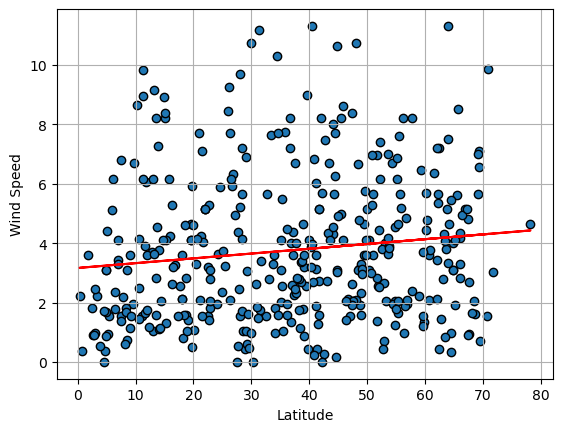

In [23]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (0,15))

the rvalue is  -0.3206256771652486


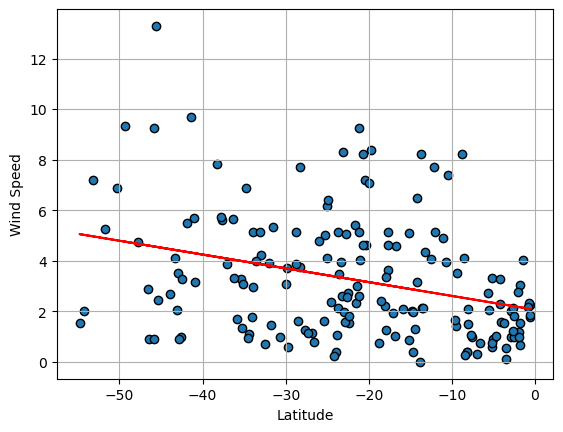

In [24]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (-55,15))

**Discussion about the linear relationship:** as the rvalue for the North is positive 0.12769552935310718 meaning when the latitude increase the wind increase and the south is negative -0.3206256771652486 because the the latitude decrease the wind decrease . 